## Name: Ayushi Gupta
# Roll no:015005

Kaggle data source link: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

# About the data
Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

# Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
Age: Positive Integer variable of the reviewers age.
Title: String variable for the title of the review.
Review Text: String variable for the review body.
Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
Division Name: Categorical name of the product high level division.
Department Name: Categorical name of the product department name.
Class Name: Categorical name of the product class name.

#Calling Libraries

In [3]:
# Call libraries
# Data manipulation libraries
import numpy as np
import pandas as pd

# sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# For plotting NN model
from skimage import io
import pydot

# Keras model components
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# Misc
import math, time, os,gc

In [4]:
# Print all outputs from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Mount G-drive

In [5]:
from google.colab import drive
drive.mount('/gdrive') 

Mounted at /gdrive


In [6]:
# Set path to our data
path = "/gdrive/MyDrive/FA-Term 5/"

Read Data

In [7]:
df = pd.read_csv(path+"Womens Clothing E-Commerce Reviews.csv",index_col=0)


In [8]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
# Print some information about dataset

print("---")
print(f"Shape of e-commerce dataset: {df.shape}")
print("---\n")

print(f"Memory Usage : {sum(df.memory_usage())/10**6} MB")   # In MB
print("-----\n")

---
Shape of e-commerce dataset: (23486, 10)
---

Memory Usage : 2.066768 MB
-----



In [10]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [11]:

print(f"Null columns in dataset:\n\n{df.isnull().sum().sort_values()}")

Null columns in dataset:

Clothing ID                   0
Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
Review Text                 845
Title                      3810
dtype: int64


In [12]:
df.dtypes
print("\n")
df.columns.values

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

array(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], dtype=object)

In [13]:
df.rename(columns={'Clothing ID': 'Clothing_ID','Review Text': 'Review_Text', 'Recommended IND': 'Recommended_IND' , 'Positive Feedback Count': 'Positive_Feedback_Count' , 'Division Name': 'Division_Name' , 'Department Name': 'Department_Name', 'Class Name': 'Class_Name'}, inplace=True)

In [14]:
df.columns.values

array(['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name'], dtype=object)

#Data Pre-Processing

Missing Values

In [15]:
# Fill missing values
# Define a function to fill missing values . We use pandas methods df.fillna()
# Fields: Division Name , Department Name, Class Name, Review Text, Title

def fill_missing(dataset):
    dataset.Division_Name.fillna(value="Missing", inplace=True)
    dataset.Department_Name.fillna(value="Missing", inplace=True)
    dataset.Class_Name.fillna(value="Missing", inplace=True)
    dataset.Review_Text.fillna(value="Missing", inplace=True)
    dataset.Title.fillna(value="Missing", inplace=True)
    return (dataset)

In [16]:
# Fill missing values now in train and test
df = fill_missing(df)

In [17]:
# Check if any value is still missing
df.isnull().sum()

Clothing_ID                0
Age                        0
Title                      0
Review_Text                0
Rating                     0
Recommended_IND            0
Positive_Feedback_Count    0
Division_Name              0
Department_Name            0
Class_Name                 0
dtype: int64

In [18]:
df.head(3)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,Missing,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Missing,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [19]:
#To check for catagorical featured 
for feature in df.columns:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print(' Number of Unique values:',df[feature].nunique())
    #print(' ')
    print('***************-end-******************************')


 
************* Column name: Clothing_ID *************
 Number of Unique values: 1206
***************-end-******************************

 
************* Column name: Age *************
 Number of Unique values: 77
***************-end-******************************

 
************* Column name: Title *************
 Number of Unique values: 13994
***************-end-******************************

 
************* Column name: Review_Text *************
 Number of Unique values: 22635
***************-end-******************************

 
************* Column name: Rating *************
 Number of Unique values: 5
***************-end-******************************

 
************* Column name: Recommended_IND *************
 Number of Unique values: 2
***************-end-******************************

 
************* Column name: Positive_Feedback_Count *************
 Number of Unique values: 82
***************-end-******************************

 
************* Column name: Division_Name *

In [20]:
# categorical columns
cat_columns = ['Department_Name','Division_Name','Class_Name']

Label encode Department_Name , Division_Name and Class_Name fields

#Label Encoding of categorical data

In [21]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in cat_columns:
    le.fit(df[x])
    df[x] = le.transform(df[x].values)

df.head()

LabelEncoder()

LabelEncoder()

LabelEncoder()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,Missing,Absolutely wonderful - silky and sexy and comf...,4,1,0,2,2,5
1,1080,34,Missing,Love this dress! it's sooo pretty. i happene...,5,1,4,0,1,3
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,0,1,3
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,1,0,14
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,0,5,0


Final look at transformed data

In [22]:
#To check for catagorical featured 
for feature in cat_columns:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print(' Number of Unique values:',df[feature].unique())
    #print(' ')
    print('***************-end-******************************')


 
************* Column name: Department_Name *************
 Number of Unique values: [2 1 0 5 3 6 4]
***************-end-******************************

 
************* Column name: Division_Name *************
 Number of Unique values: [2 0 1 3]
***************-end-******************************

 
************* Column name: Class_Name *************
 Number of Unique values: [ 5  3 14  0  8 13 11 18 16  4 17  6 19 20  7 10 15  9  1 12  2]
***************-end-******************************


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    23486 non-null  object
 3   Review_Text              23486 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended_IND          23486 non-null  int64 
 6   Positive_Feedback_Count  23486 non-null  int64 
 7   Division_Name            23486 non-null  int64 
 8   Department_Name          23486 non-null  int64 
 9   Class_Name               23486 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 2.0+ MB


#Scalling

In [24]:
ss= MinMaxScaler(feature_range=(-1, 1))
df["Age"] = ss.fit_transform(df.Age.values.reshape(-1, 1))

In [25]:
df["Positive_Feedback_Count"] = ss.fit_transform(df.Positive_Feedback_Count.values.reshape(-1, 1))

In [26]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,-0.629630,Missing,Absolutely wonderful - silky and sexy and comf...,4,1,-1.000000,2,2,5
1,1080,-0.604938,Missing,Love this dress! it's sooo pretty. i happene...,5,1,-0.934426,0,1,3
2,1077,0.037037,Some major design flaws,I had such high hopes for this dress and reall...,3,0,-1.000000,0,1,3
3,1049,-0.209877,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,-1.000000,1,0,14
4,847,-0.283951,Flattering shirt,This shirt is very flattering to all due to th...,5,1,-0.901639,0,5,0


#Transform text fields to integer sequences

Fields are Review_Text and Title.
By default, Tokenizer() removes all punctuation, turning the texts into space-separated sequences of words (words maybe include the ' character). These sequences are then split into lists of tokens. They are then indexed.

In [27]:
te = Tokenizer()  # Create Tokenizer() object
te.fit_on_texts(df.Review_Text.values) # Just training. No transformation as yet

print("Transforming of text to int seq for column, 'seq_Review_Text'") #  Transform 'Review_Text' to integer sequences
df["seq_Review_Text"] = te.texts_to_sequences(df.Review_Text.values)
print("-----\n")

Transforming of text to int seq for column, 'seq_Review_Text'
-----



In [28]:
te.fit_on_texts(df.Title.values) # Just training. No transformation as yet

print("Transforming of text to int seq for column, 'seq_Title'") #  Transform 'Review_Text' to integer sequences
df["seq_Title"] = te.texts_to_sequences(df.Title.values)
print("-----\n")

Transforming of text to int seq for column, 'seq_Title'
-----



In [29]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,seq_Review_Text,seq_Title
0,767,-0.629630,Missing,Absolutely wonderful - silky and sexy and comf...,4,1,-1.000000,2,2,5,"[254, 533, 918, 3, 663, 3, 68]",[48]
1,1080,-0.604938,Missing,Love this dress! it's sooo pretty. i happene...,5,1,-0.934426,0,1,3,"[21, 7, 18, 33, 1713, 99, 2, 1323, 8, 221, 5, ...",[48]
2,1077,0.037037,Some major design flaws,I had such high hopes for this dress and reall...,3,0,-1.000000,0,1,3,"[2, 65, 313, 178, 1096, 12, 7, 18, 3, 51, 195,...","[158, 1835, 135, 1101]"
3,1049,-0.209877,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,-1.000000,1,0,14,"[2, 21, 21, 21, 7, 631, 33, 284, 1303, 3, 789,...","[18, 293, 221]"
4,847,-0.283951,Flattering shirt,This shirt is very flattering to all due to th...,5,1,-0.901639,0,5,0,"[7, 80, 6, 23, 58, 8, 75, 487, 8, 1, 1158, 156...","[56, 72]"


In [31]:
#      Vocabulary sizes of all text-sequences and all label-encoded caregories
#      This would be max integer value used in any column.
#      Because conversion to integer sequence starts from 1 


# Columns seq_Review_Text
MAX_REVIEW_TEXT = np.max([df.explode('seq_Review_Text')['seq_Review_Text'].max() ]
                     ) + 1
print(f"Maximum Vocabulary size in seq_Review_text is {MAX_REVIEW_TEXT}")

# Columns seq_Title
MAX_TITLE = np.max([df.explode('seq_Title')['seq_Title'].max() ]
                     ) + 1
print(f"Maximum Vocabulary size in seq_Title is {MAX_TITLE}")

Maximum Vocabulary size in seq_Review_text is 14848
Maximum Vocabulary size in seq_Title is 15395


In [32]:
#  Column Division_Name (transformed by label encoder)
MAX_Division_Name = df.Division_Name.max() + 1

print(f"Maximum Vocabulary size in Division_Name is {MAX_Division_Name}")

Maximum Vocabulary size in Division_Name is 4


In [33]:
#  Column Department_Name (transformed by label encoder)
MAX_Department_Name = df.Department_Name.max() + 1

print(f"Maximum Vocabulary size in Department_Name is {MAX_Department_Name}")

Maximum Vocabulary size in Department_Name is 7


In [34]:
#  Column Class_Name (transformed by label encoder)
MAX_Class_Name = df.Class_Name.max() + 1

print(f"Maximum Vocabulary size in Class_Name is {MAX_Class_Name}")

Maximum Vocabulary size in Class_Name is 21


In [35]:

# Columnalready in integer format
MAX_Rating = df.Rating.max()
print(f"Maximum Vocabulary size in Rating is {MAX_Rating} ")

MAX_Positive_Feedback_Count = df.Positive_Feedback_Count.max()+1
print(f"Maximum Vocabulary size in Positive_Feedback_Count is {MAX_Positive_Feedback_Count} ")

MAX_Age = df.Age.max()
print(f"Maximum Vocabulary size in Age is {MAX_Age} ")

Maximum Vocabulary size in Rating is 5 
Maximum Vocabulary size in Positive_Feedback_Count is 2.0 
Maximum Vocabulary size in Age is 0.9999999999999998 


In [36]:
max_Title_seq=np.max(df.seq_Title.apply(lambda x: len(x)))
print(f"Max Title seq length: {max_Title_seq}")

Max Title seq length: 12


In [37]:
max_Review_Text_seq=np.max(df.seq_Review_Text.apply(lambda x: len(x)))
print(f"Max Review Text seq length: {max_Review_Text_seq}")

Max Review Text seq length: 116


Histogram to look at distributions

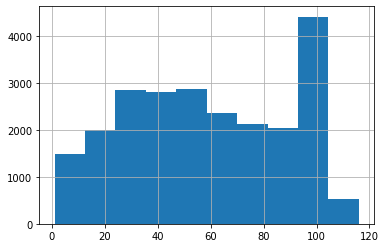

In [38]:
df.seq_Review_Text.apply(lambda x: len(x)).hist()

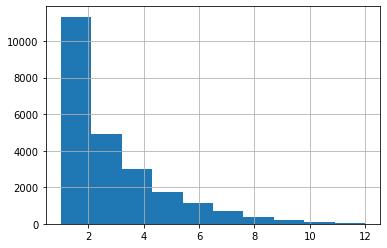

In [39]:
df.seq_Title.apply(lambda x: len(x)).hist()

In [40]:
# EMBEDDINGS MAX VALUES
#     Based on the histograms, we select the max lengths


MAX_REVIEW_TEXT_SEQ = 100
MAX_TITLE_SEQ = 10

In [41]:
num_col=["Age","Positive_Feedback_Count"]

In [42]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,seq_Review_Text,seq_Title
0,767,-0.629630,Missing,Absolutely wonderful - silky and sexy and comf...,4,1,-1.000000,2,2,5,"[254, 533, 918, 3, 663, 3, 68]",[48]
1,1080,-0.604938,Missing,Love this dress! it's sooo pretty. i happene...,5,1,-0.934426,0,1,3,"[21, 7, 18, 33, 1713, 99, 2, 1323, 8, 221, 5, ...",[48]
2,1077,0.037037,Some major design flaws,I had such high hopes for this dress and reall...,3,0,-1.000000,0,1,3,"[2, 65, 313, 178, 1096, 12, 7, 18, 3, 51, 195,...","[158, 1835, 135, 1101]"
3,1049,-0.209877,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,-1.000000,1,0,14,"[2, 21, 21, 21, 7, 631, 33, 284, 1303, 3, 789,...","[18, 293, 221]"
4,847,-0.283951,Flattering shirt,This shirt is very flattering to all due to th...,5,1,-0.901639,0,5,0,"[7, 80, 6, 23, 58, 8, 75, 487, 8, 1, 1158, 156...","[56, 72]"


In [43]:
#df.drop(['Clothing_ID'], axis = 1)

#Data Split

In [44]:
X= df.drop('Recommended_IND',axis=1)
y= df.pop('Recommended_IND')

In [45]:
X_C=X.copy()

In [46]:
y_C=y.copy()

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [48]:
X_train.shape   
X_test.shape  
X_val.shape

(14091, 11)

(4698, 11)

(4697, 11)

In [49]:
#Define callback function for earlystopping and storing weights
# Place where checkpoint data will be stored
checkptfilepath = "/content/model"

# Delete if it exists
! rm -r -f /content/model

# Define callbacks now: 
callbacks = [
    EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    ),

    ModelCheckpoint( filepath=checkptfilepath, save_best_only=True) #save best which gives minimum validation loss
]

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14091 entries, 10786 to 5542
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing_ID              14091 non-null  int64  
 1   Age                      14091 non-null  float64
 2   Title                    14091 non-null  object 
 3   Review_Text              14091 non-null  object 
 4   Rating                   14091 non-null  int64  
 5   Positive_Feedback_Count  14091 non-null  float64
 6   Division_Name            14091 non-null  int64  
 7   Department_Name          14091 non-null  int64  
 8   Class_Name               14091 non-null  int64  
 9   seq_Review_Text          14091 non-null  object 
 10  seq_Title                14091 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 1.3+ MB


#Define a function to create a dictionary of data

In [51]:
def get_keras_data(dataset):
    X = {   
        'Review_text_in':           pad_sequences(dataset.seq_Review_Text, maxlen=MAX_REVIEW_TEXT_SEQ),                        # 1
        'Title_in':                 pad_sequences(dataset.seq_Title, maxlen=MAX_TITLE_SEQ),       # 2
        'Class_Name_in':            dataset.Class_Name.values,                                                # 3
        'Department_Name_in':       dataset.Department_Name.values,                                                # 4
        'Division_Name_in':         dataset.Division_Name.values,      #5
        'num_vars_in':              np.array(dataset[["Age", "Rating","Positive_Feedback_Count"]])    # Two numeric columns here   # 6
    }
    return X


In [52]:
# Get these datasets now:
X_train = get_keras_data(X_train)  # type: dict

In [53]:
X_train.keys()

dict_keys(['Review_text_in', 'Title_in', 'Class_Name_in', 'Department_Name_in', 'Division_Name_in', 'num_vars_in'])

In [54]:
# Similarly get subsets for X_val and X_test:

X_val = get_keras_data(X_val)
X_test = get_keras_data(X_test)

#About embedding of categorical values in vector-space

In [55]:
# Define sizes of categorical values AND word to vectors Sizes

word2vec_size = 60   # For text columns
cat2vec_size = 10    # For Department, Division and Class name
cond2vec_size = 5    

Input layers definititon

In [56]:
# SIX Inputs. At each input specify number of input-features:

review_text =            Input(shape=[X_train["Review_text_in"].shape[1]],     name="Review_text_in")           # Length of each sequence . this variable with .shape[1] is the padding length
title =       Input(shape=[X_train["Title_in"].shape[1]], name="Title_in")      # Length of each sequence
class_name =      Input(shape=[1],                             name="Class_Name_in")     # Just 1 feature. Hence shape=[1]
department_name =   Input(shape=[1],                             name="Department_Name_in")  # Just 1 feature. Hence shape=[1]
division_name =  Input(shape=[1],                             name="Division_Name_in") # Just 1 feature. Hence shape = [1]
#num_vars =        Input(shape=[X_train["num_vars_in"].shape[1]],  name="num_vars_in")
num_vars =        Input(shape=[X_train["num_vars_in"].shape[1],1],  name="num_vars_in")

In [58]:
# FIVE Embeddings layers.  Embedding vectors of first FIVE of the above

emb_review_text =           Embedding(MAX_REVIEW_TEXT,      word2vec_size  )(review_text)               
emb_title =      Embedding(MAX_TITLE,      word2vec_size  )(title)

# Output of following three go directly into Dense layer after flattening
#        These need to be flattened as for every timestep there is a vector
emb_class_name =     Embedding(MAX_Class_Name,     cat2vec_size  )(class_name)
emb_department_name =  Embedding(MAX_Department_Name,  cat2vec_size  )(department_name)
emb_division_name = Embedding(MAX_Division_Name, cat2vec_size )(division_name)

In [59]:
from keras.layers import LSTM
review_text_lstm= LSTM(64)(emb_review_text)
title_lstm= LSTM(64)(emb_title)
class_name_lstm= LSTM(64)(emb_class_name)
department_name_lstm= LSTM(64)(emb_department_name)
division_name_lstm= LSTM(64)(emb_division_name)

In [ ]:
#inp = tf.keras.Input(shape = (X_train["num_vars_in"].shape[1],1))

In [61]:
#  Before we concatenate, let us see shape of each output tensor:

print(f"emb_class_name: {emb_class_name.shape}")           
print(f"emb_department_name: {emb_department_name.shape}")      
print(f"emb_division_name: {emb_division_name.shape}")    
                

emb_class_name: (None, 1, 10)
emb_department_name: (None, 1, 10)
emb_division_name: (None, 1, 10)


In [68]:
# Concatenate all layer-branches:

main_l = concatenate(
                        [
                         Flatten() (review_text_lstm),
                         Flatten() (title_lstm),
                         Flatten() (class_name_lstm),
                         Flatten() (department_name_lstm),
                         Flatten() (division_name_lstm),
                         Flatten() (num_vars)          # Feed numerical variables as they are
                        ]
                      )

In [69]:
dr_r = 0.1   

# Add classification layer
main_l = Dense(128) (main_l)
main_l = Dropout(dr_r)(main_l)
main_l = Dense(64) (main_l)
main_l = Dropout(dr_r) (main_l)

In [70]:
# Output neuron
output = Dense(1, activation="sigmoid") (main_l)

In [71]:
# Create model now
model = Model(inputs = [review_text,title,class_name,department_name,division_name,num_vars], outputs = [output])

In [72]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Review_text_in (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 Title_in (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 Class_Name_in (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Department_Name_in (InputLayer  [(None, 1)]         0           []                               
 )                                                                                          

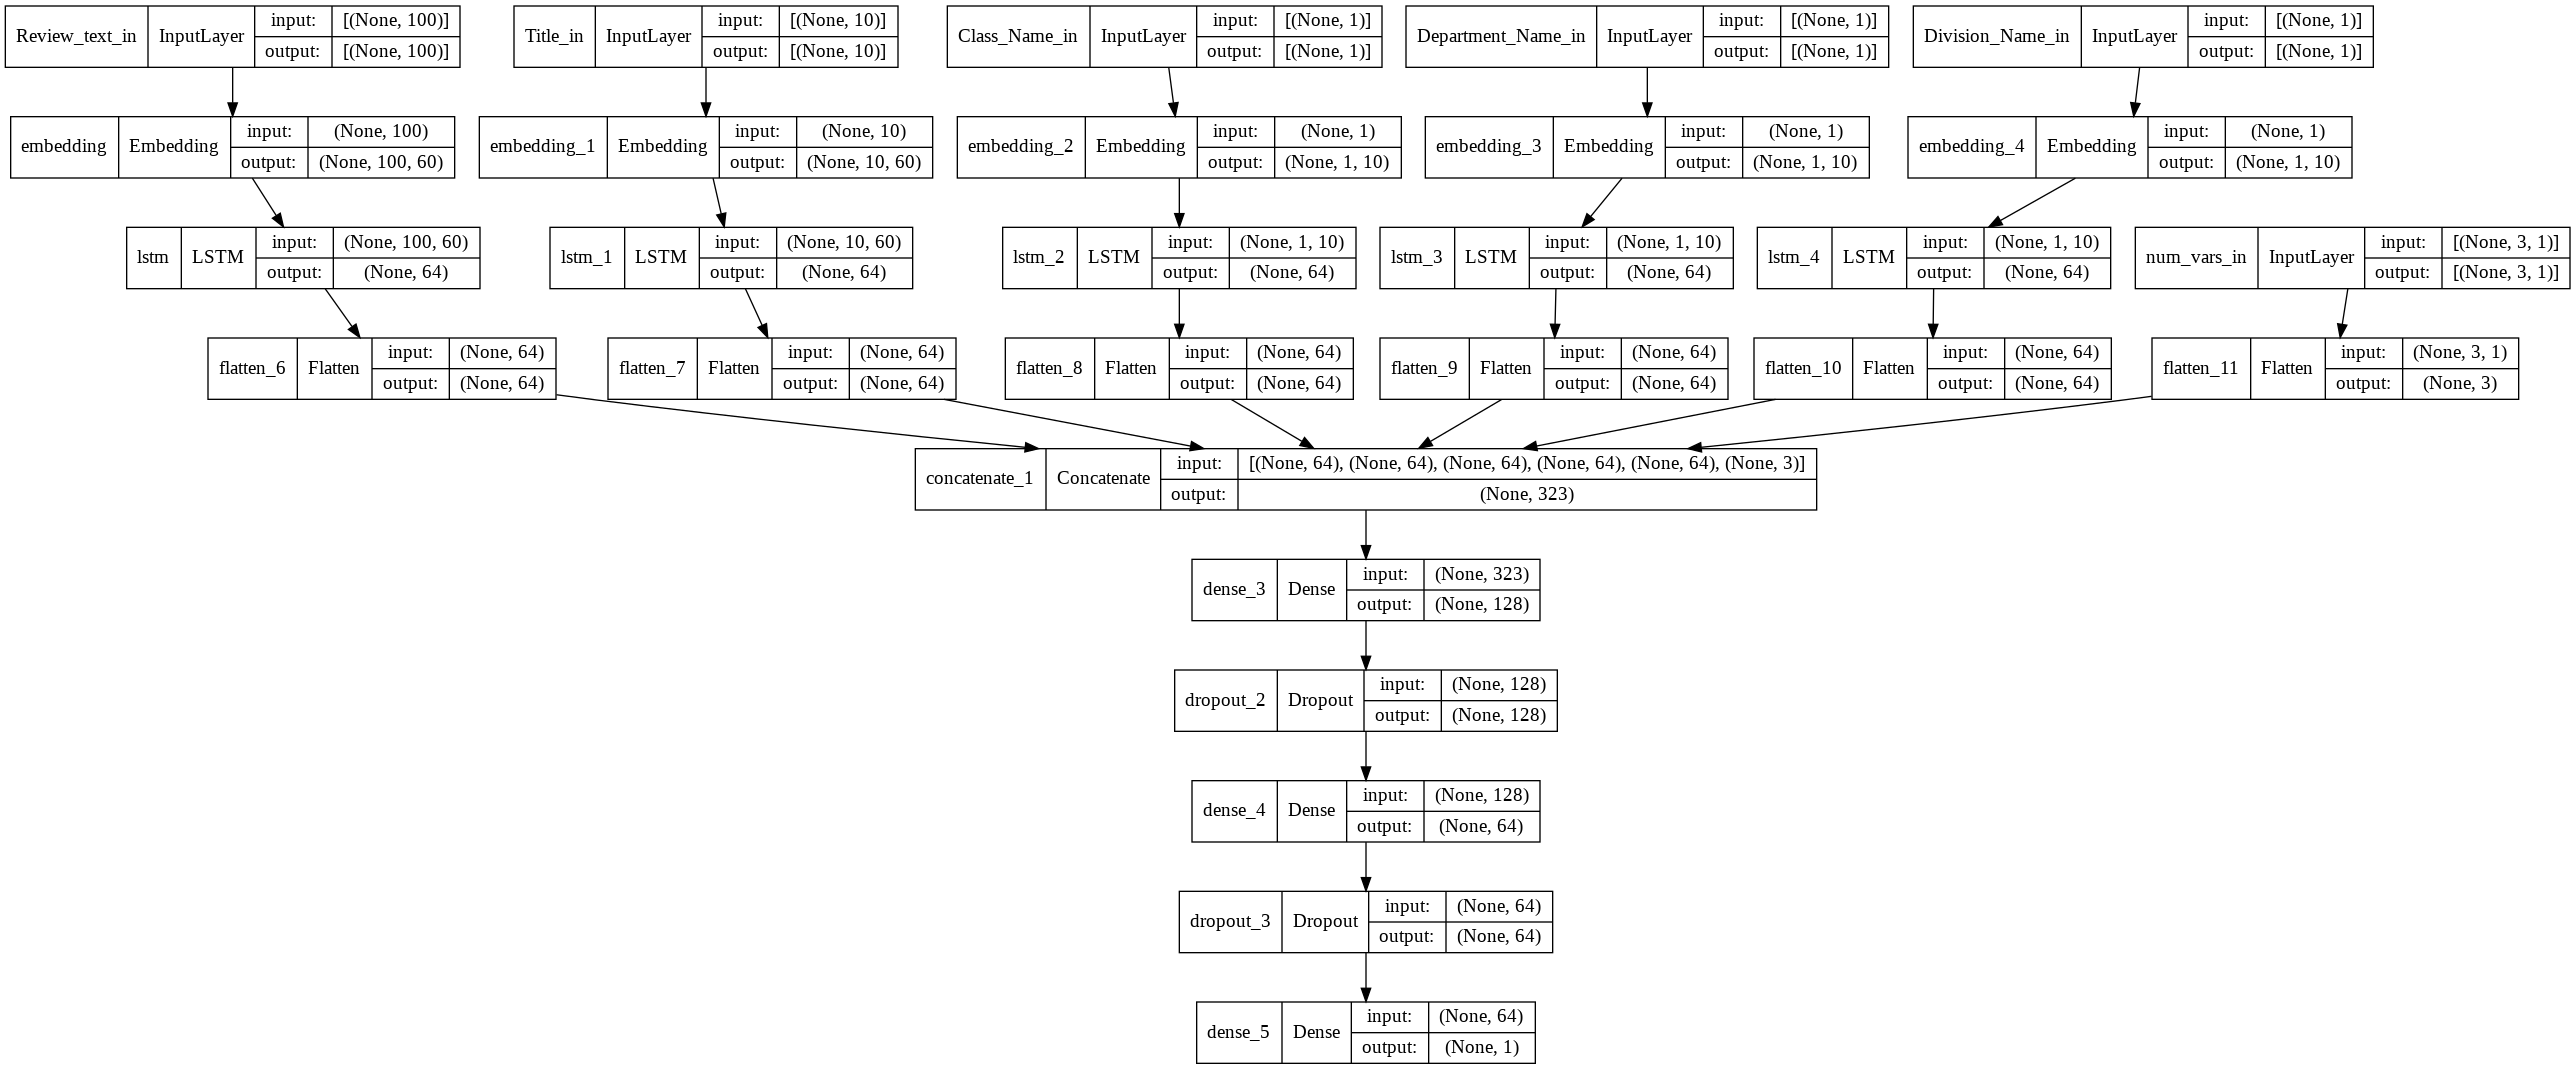

In [73]:
plot_model(model, show_shapes= True)

In [74]:
def get_callbacks(patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True)
    return [es, msave]

In [83]:
BATCH_SIZE = 200
epochs = 10

model.compile(loss = "mean_squared_error", optimizer='adam', metrics=['accuracy'])  
start = time.time()
history = model.fit(
                    X_train,
                    y_train,
                    epochs = epochs,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val),
                    verbose = 1,
                    callbacks= get_callbacks()
                    )
end = time.time()
print((end-start)/60)   

Epoch 1/10
71/71 [==============================] - 28s 279ms/step - loss: 0.0045 - accuracy: 0.9953 - val_loss: 0.0623 - val_accuracy: 0.9291
Epoch 2/10
71/71 [==============================] - 14s 204ms/step - loss: 0.0037 - accuracy: 0.9962 - val_loss: 0.0641 - val_accuracy: 0.9293
Epoch 3/10
71/71 [==============================] - 15s 205ms/step - loss: 0.0039 - accuracy: 0.9957 - val_loss: 0.0638 - val_accuracy: 0.9263
0.94432346423467


In [84]:
model.evaluate(X_test,y_test)  

147/147 [==============================] - 2s 14ms/step - loss: 0.0682 - accuracy: 0.9246


[0.06818871200084686, 0.9246487617492676]

In [85]:
preds = model.predict(X_test, batch_size=BATCH_SIZE)

print(preds[:10])

[[1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.94285494]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]]


In [86]:
print('Outputs shape')    
print(preds.shape) # prints (n,1) but  need (n,)
preds=np.transpose(preds)[0]  # transformation to get (n,)
print(preds.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold

Outputs shape
(4698, 1)
(4698,)


In [87]:
preds = list(map(lambda x: 0 if x<0.5 else 1, preds))

In [91]:
results = model.evaluate(X_test, y_test, batch_size=120)
print("test loss, test acc:", results)

40/40 [==============================] - 2s 43ms/step - loss: 0.0682 - accuracy: 0.9246
test loss, test acc: [0.06818871200084686, 0.9246487617492676]
